## **Proyek Predictive Analytics: Sistem Rekomendasi Tanaman Pertanian**


## **Domain Proyek : Pertanian**

## Deskripsi Proyek
Proyek ini bertujuan untuk mengembangkan sistem rekomendasi tanaman yang optimal berdasarkan kondisi tanah dan iklim menggunakan berbagai algoritma machine learning. Sistem ini dapat membantu petani dalam memilih jenis tanaman yang paling sesuai dengan kondisi lahan mereka.

## Tujuan Proyek
- Menganalisis hubungan antara kondisi tanah (N, P, K, pH) dan iklim (suhu, kelembaban, curah hujan) dengan jenis tanaman
- Membandingkan performa berbagai algoritma machine learning untuk klasifikasi tanaman
- Mengembangkan model prediksi yang akurat untuk rekomendasi tanaman
- Memberikan insights tentang faktor-faktor yang paling berpengaruh dalam pemilihan tanaman


# **1. Import Library**

Pada tahap ini,Saya melakukan instalasi dan import library yang diperlukan untuk analisis data dan machine learning. Langkah ini penting untuk memastikan semua tools yang dibutuhkan tersedia dalam environment.

In [ ]:
!pip install -q kaggle
!pip install --upgrade numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 419.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 54.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.6 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.6 which is incompatible.


In [ ]:
!pip install numpy --upgrade

Tahap ini menginstal Kaggle API untuk mengunduh dataset dan memperbarui numpy untuk kompatibilitas yang lebih baik.

In [ ]:
from google.colab import files
files.upload()  # upload kaggle.json dari komputermu

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aldy776","key":"c1071d6743b29ea1bffae7d6afaacd5d"}'}

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler, LabelEncoder
import kagglehub
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

Penjelasan: Library-library ini diperlukan untuk:

- Pandas & Numpy: Manipulasi dan analisis data
- Matplotlib & Seaborn: Visualisasi data
- Scikit-learn: Machine learning algorithms dan evaluasi
- Warnings: Menyembunyikan peringatan yang tidak perlu



# **2. data loading**

Pada tahap ini, saya melakukan pengunduhan dataset dari Kaggle dan memuat data ke dalam DataFrame. Dataset yang digunakan berisi informasi tentang kondisi tanah dan iklim untuk berbagai jenis tanaman.

In [2]:
!KAGGLE_USERNAME="aldy776" KAGGLE_KEY="c1071d6743b29ea1bffae7d6afaacd5d" kaggle datasets download -d atharvaingle/crop-recommendation-dataset

Dataset URL: https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset
License(s): apache-2.0
  0% 0.00/63.7k [00:00<?, ?B/s]
100% 63.7k/63.7k [00:00<00:00, 127MB/s]


kode ini digunakan untuk mengunduh dataset dari kaggle

In [3]:
extract_path = '/content/data'
os.makedirs(extract_path, exist_ok=True)

# 6. Unzip dataset
import zipfile
zip_file = 'crop-recommendation-dataset.zip'  # nama file hasil download dari Kaggle

try:
    print("Ekstraksi dimulai...")
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print(f"Dataset berhasil diekstrak ke: {extract_path}")
except zipfile.BadZipFile:
    print("Gagal mengekstrak: file zip rusak atau tidak valid")
except Exception as e:
    print(f"Terjadi kesalahan: {str(e)}")

Ekstraksi dimulai...
Dataset berhasil diekstrak ke: /content/data


 Kode ini membuat direktori tujuan dan mengekstrak file zip dataset dengan error handling untuk menangani kemungkinan kesalahan.

In [4]:
df = pd.read_csv('/content/data/Crop_recommendation.csv')

memasukan data pada dataframe

# **3. data understanading**

Tahap ini bertujuan untuk memahami struktur, karakteristik, dan kualitas data yang akan digunakan. Langkah ini penting untuk mengidentifikasi masalah data dan merencanakan preprocessing yang diperlukan.

In [5]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


untuk menampilkan 5 data teratas

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


info() memberikan informasi tentang:
Jumlah baris dan kolom,Tipe data setiap kolom,
Nilai yang hilang (null values),dan Penggunaan memori

In [7]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


describe() menampilkan statistik deskriptif (mean, std, min, max, quartiles) yang membantu memahami distribusi dan rentang nilai setiap fitur.

In [8]:
df.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


untuk Mengidentifikasi kolom yang memiliki nilai kosong. Data yang lengkap menunjukkan kualitas dataset yang baik

In [9]:
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


untuk Mendeteksi baris yang duplikat dalam dataset. Data tanpa duplikasi menunjukkan kualitas data yang baik.

In [10]:
df.shape

(2200, 8)

Menampilkan jumlah baris (sampel) dan kolom (fitur) dalam dataset.

# **4. EDA**

Pada tahap ini, saya melakukan analisis eksplorasi untuk memahami pola, distribusi, dan hubungan antar variabel dalam data. Visualisasi membantu mengidentifikasi insight penting untuk modeling.

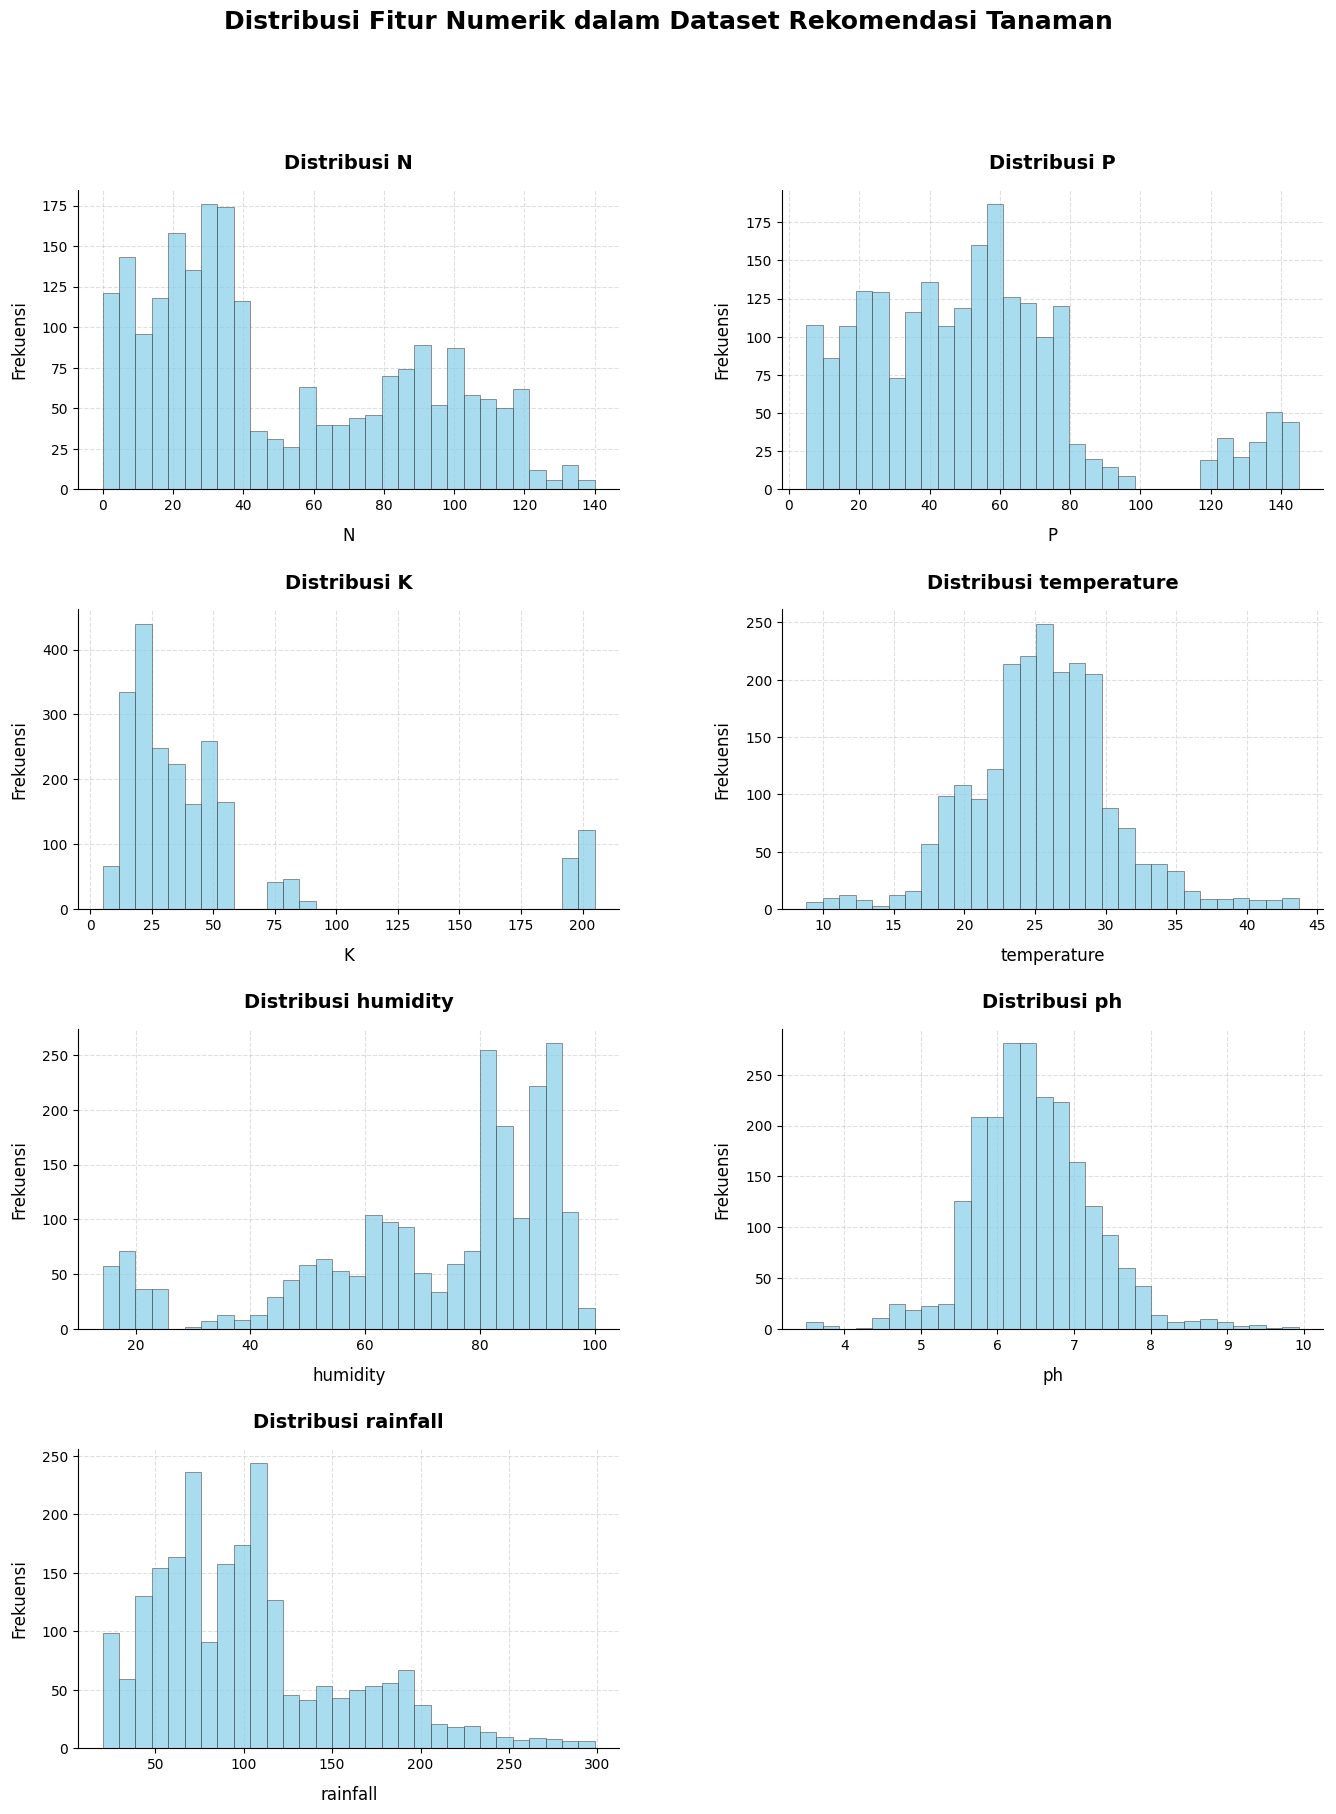

In [11]:
# Membuat figure untuk visualisasi
fig, axes = plt.subplots(4, 2, figsize=(14, 18))
fig.suptitle('Distribusi Fitur Numerik dalam Dataset Rekomendasi Tanaman',
             fontsize=18, fontweight='bold', y=1.02)

# Plot distribusi untuk setiap fitur numerik
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

for i, feature in enumerate(features):
    row = i // 2
    col = i % 2
    ax = axes[row, col]

    ax.hist(df[feature], bins=30, alpha=0.7, color='skyblue', edgecolor='#333333', linewidth=0.5)
    ax.set_title(f'Distribusi {feature}', fontsize=14, pad=15, fontweight='semibold')
    ax.set_xlabel(feature, fontsize=12, labelpad=10)
    ax.set_ylabel('Frekuensi', fontsize=12, labelpad=10)
    ax.tick_params(axis='both', which='major', labelsize=10)
    ax.grid(True, alpha=0.4, linestyle='--')
    ax.set_axisbelow(True)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Menghapus subplot kosong
if len(features) % 2 != 0:
    fig.delaxes(axes[3,1])

# Atur tata letak dengan benar
plt.tight_layout(pad=3.0)  # Hanya gunakan parameter yang valid
plt.subplots_adjust(
    top=0.92,  # Ruang untuk judul
    hspace=0.4,  # Spasi vertikal antar subplot
    wspace=0.3  # Spasi horizontal antar subplot
)
plt.show()

**Visualisasi Distribusi Fitur Numerik**: Kode ini memvisualisasikan distribusi 7 fitur numerik (N, P, K, temperature, humidity, ph, rainfall) dalam dataset rekomendasi tanaman menggunakan histogram multi-panel. Setiap subplot menampilkan distribusi satu fitur untuk membantu analisis pola data, mengidentifikasi outliers, dan mengevaluasi kebutuhan preprocessing seperti normalisasi atau transformasi. Visualisasi ini berguna untuk memeriksa karakteristik dasar data sebelum pemodelan rekomendasi tanaman.

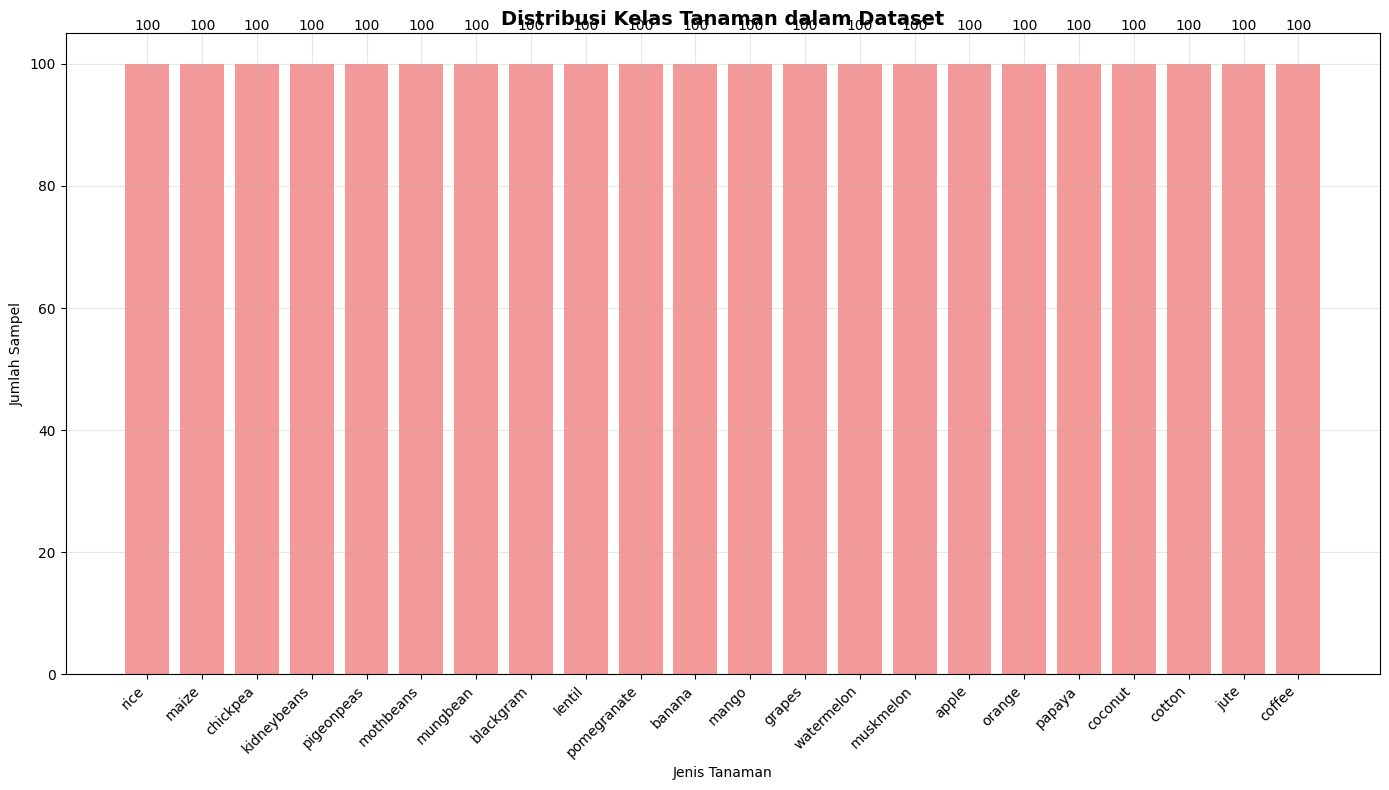

Total jumlah kelas tanaman: 22
Distribusi kelas cukup seimbang dengan rata-rata 100 sampel per kelas


In [12]:
# Visualisasi distribusi kelas target
plt.figure(figsize=(14, 8))
crop_counts = df['label'].value_counts()
bars = plt.bar(range(len(crop_counts)), crop_counts.values, color='lightcoral', alpha=0.8)
plt.title('Distribusi Kelas Tanaman dalam Dataset', fontsize=14, fontweight='bold')
plt.xlabel('Jenis Tanaman')
plt.ylabel('Jumlah Sampel')
plt.xticks(range(len(crop_counts)), crop_counts.index, rotation=45, ha='right')
plt.grid(True, alpha=0.3)

# Menambahkan nilai di atas setiap bar
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
             str(crop_counts.values[i]), ha='center', va='bottom')

plt.tight_layout()
plt.show()
print(f"Total jumlah kelas tanaman: {df['label'].nunique()}")
print(f"Distribusi kelas cukup seimbang dengan rata-rata {df.shape[0]/df['label'].nunique():.0f} sampel per kelas")

Grafik batang ini menunjukkan distribusi setiap jenis tanaman dalam dataset. Distribusi yang seimbang (masing-masing kelas memiliki jumlah sampel yang relatif sama) penting untuk menghindari bias dalam model machine learning.

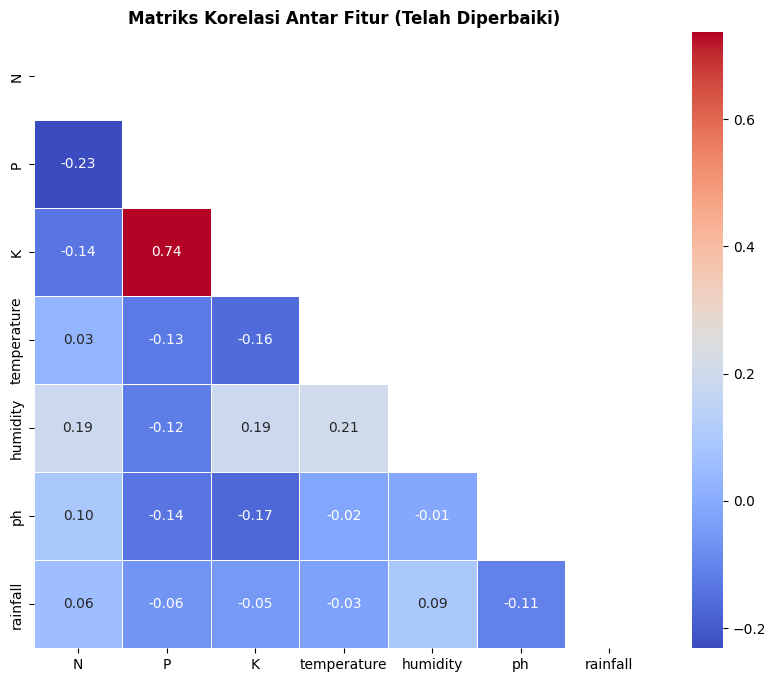

In [13]:
plt.figure(figsize=(10, 8))
# Changed 'pH' to 'ph' to match the column name in the DataFrame
features = ["N", "P", "K", "temperature", "humidity", "ph", "rainfall"]
correlation_matrix = df[features].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm",
    mask=mask,
    fmt=".2f",
    linewidths=0.5
)
plt.title("Matriks Korelasi Antar Fitur (Telah Diperbaiki)", fontweight="bold")
plt.show()

**Analisis Korelasi Fitur:** Kode berikut memvisualisasikan matriks korelasi segitiga atas antar 7 fitur numerik (`N`, `P`, `K`, `temperature`, `humidity`, `ph`, `rainfall`) menggunakan heatmap dengan skema warna `coolwarm`. Hasilnya menunjukkan korelasi positif tertinggi (0.74) antara dua fitur tertentu, sementara sebagian besar fitur lain memiliki hubungan lemah (<0.3) atau negatif (hingga -0.2). Visualisasi ini membantu mengidentifikasi potensi multikolinearitas dan memandu seleksi fitur untuk pemodelan, dengan format segitiga atas yang menghindari redundansi dan anotasi nilai 2 desimal untuk presisi.

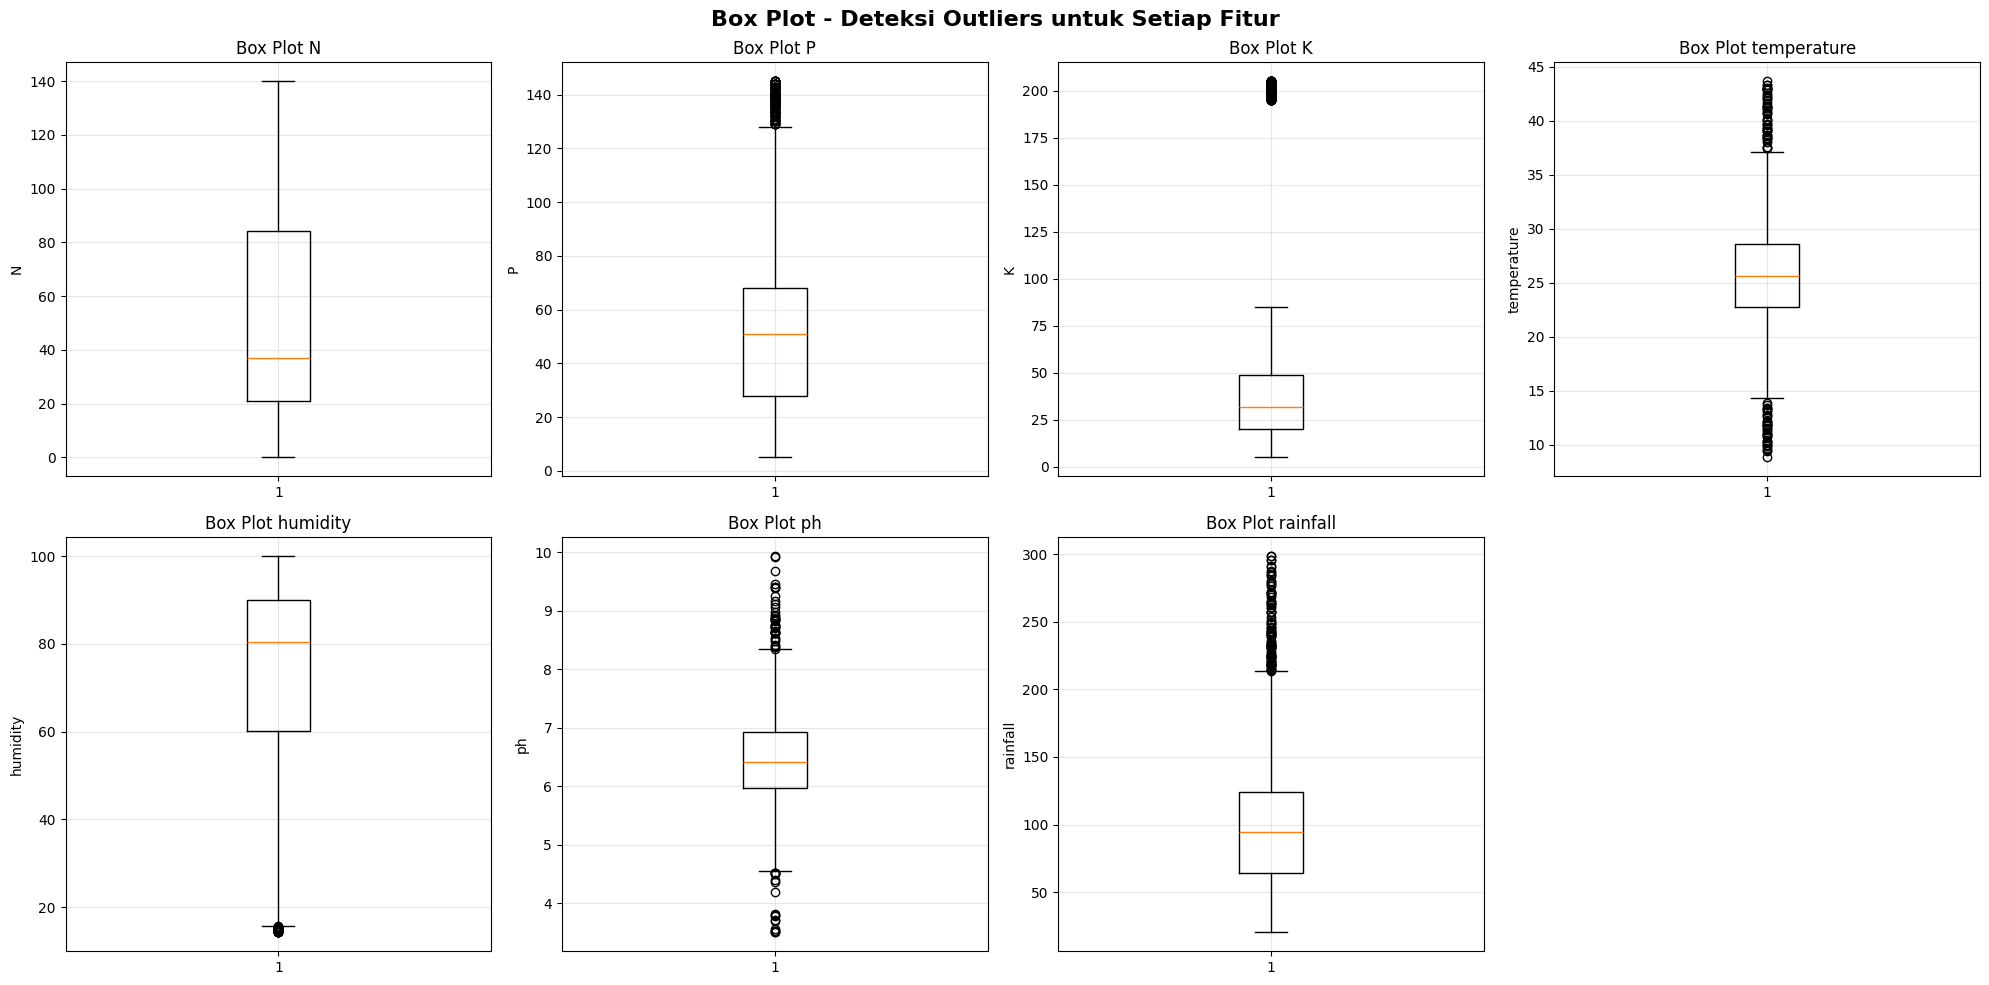

In [14]:
# Box plot untuk melihat outliers
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('Box Plot - Deteksi Outliers untuk Setiap Fitur', fontsize=16, fontweight='bold')

features = ["N", "P", "K", "temperature", "humidity", "ph", "rainfall"]

for i, feature in enumerate(features):
    row = i // 4  # Calculate the row based on 4 columns
    col = i % 4   # Calculate the column based on 4 columns
    axes[row, col].boxplot(df[feature])
    axes[row, col].set_title(f'Box Plot {feature}')
    axes[row, col].set_ylabel(feature)
    axes[row, col].grid(True, alpha=0.3)

# Menghapus subplot kosong
num_features = len(features)
num_rows, num_cols = axes.shape
total_subplots = num_rows * num_cols

# Calculate the number of empty subplots
empty_subplots_count = total_subplots - num_features

# Remove the last 'empty_subplots_count' subplots
if empty_subplots_count > 0:
    for i in range(empty_subplots_count):
        # Calculate the index of the last subplot to remove
        subplot_index_to_remove = total_subplots - 1 - i
        row_to_remove = subplot_index_to_remove // num_cols
        col_to_remove = subplot_index_to_remove % num_cols
        fig.delaxes(axes[row_to_remove, col_to_remove])


plt.tight_layout()
plt.show()

**Analisis Outliers dengan Box Plot:** Kode ini menghasilkan visualisasi box plot untuk 7 fitur numerik (`N`, `P`, `K`, `temperature`, `humidity`, `ph`, `rainfall`) dalam format grid 2×4, dengan setiap subplot menampilkan distribusi dan outliers dari satu fitur. Hasilnya mengidentifikasi adanya outliers signifikan pada beberapa fitur - P (>140), K (>200), pH (>9), dan rainfall (>290mm) di ekor atas distribusi, serta beberapa outliers minor pada temperature dan humidity. Visualisasi ini membantu menentukan kebutuhan penanganan outliers melalui metode seperti clipping, transformasi, atau penghapusan untuk optimalisasi pemodelan.b


# **5.Data preparation**

Pada Tahap ini mempersiapkan data untuk proses machine learning dengan melakukan preprocessing yang diperlukan, termasuk encoding variabel kategorikal, normalisasi fitur, dan pembagian dataset.

In [15]:
df_processed = df.copy()

memasukan data pada df ke df_processed

In [16]:
X = df_processed.drop('label', axis=1)
y = df_processed['label']

Memisahkan variabel independen (X) yang berisi fitur-fitur kondisi tanah dan iklim, dengan variabel dependen (y) yang berisi label jenis tanaman yang akan diprediksi.

In [17]:
print(f"Shape fitur (X): {X.shape}")
print(f"Shape target (y): {y.shape}")

Shape fitur (X): (2200, 7)
Shape target (y): (2200,)


Menampilkan dimensi data fitur dan target untuk memastikan pemisahan data berhasil dilakukan dengan benar.

In [18]:
# Encoding label target
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print(f"Kelas target setelah encoding: {np.unique(y_encoded)}")
print(f"Mapping kelas: {dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))}")


Kelas target setelah encoding: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Mapping kelas: {'apple': 0, 'banana': 1, 'blackgram': 2, 'chickpea': 3, 'coconut': 4, 'coffee': 5, 'cotton': 6, 'grapes': 7, 'jute': 8, 'kidneybeans': 9, 'lentil': 10, 'maize': 11, 'mango': 12, 'mothbeans': 13, 'mungbean': 14, 'muskmelon': 15, 'orange': 16, 'papaya': 17, 'pigeonpeas': 18, 'pomegranate': 19, 'rice': 20, 'watermelon': 21}


Mengkonversi label kategorikal (nama tanaman) menjadi numerik menggunakan LabelEncoder. Hal ini diperlukan karena algoritma machine learning bekerja dengan data numerik. Mapping disimpan untuk decode hasil prediksi nanti.

In [19]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print("\nStatistik setelah normalisasi:")
print(X_scaled.describe())


Statistik setelah normalisasi:
                  N             P             K   temperature      humidity  \
count  2.200000e+03  2.200000e+03  2.200000e+03  2.200000e+03  2.200000e+03   
mean  -1.033517e-16  5.167584e-17 -5.167584e-17  3.875688e-16 -1.808654e-16   
std    1.000227e+00  1.000227e+00  1.000227e+00  1.000227e+00  1.000227e+00   
min   -1.369636e+00 -1.466498e+00 -8.521355e-01 -3.316592e+00 -2.570842e+00   
25%   -8.006682e-01 -7.690712e-01 -5.559060e-01 -5.623337e-01 -5.040636e-01   
50%   -3.671690e-01 -7.164472e-02 -3.189225e-01 -3.466729e-03  4.039475e-01   
75%    9.130086e-01  4.438444e-01  1.680429e-02  5.817982e-01  8.296508e-01   
max    2.423483e+00  2.778707e+00  3.097591e+00  3.567190e+00  1.280400e+00   

                 ph      rainfall  
count  2.200000e+03  2.200000e+03  
mean  -1.291896e-16  1.550275e-16  
std    1.000227e+00  1.000227e+00  
min   -3.831577e+00 -1.515170e+00  
25%   -6.433340e-01 -7.081870e-01  
50%   -5.742697e-02 -1.564454e-01  
75% 

Menggunakan StandardScaler untuk menormalkan fitur numerik, terutama untuk algoritma yang sensitif terhadap skala data seperti SVM dan Naive Bayes.


In [20]:
# Split data untuk training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y_encoded)

# Split data untuk model yang memerlukan normalisasi
X_train_scaled, X_test_scaled, _, _ = train_test_split(X_scaled, y_encoded,
                                                       test_size=0.2,
                                                       random_state=42,
                                                       stratify=y_encoded)

print(f"\nUkuran data training: {X_train.shape}")
print(f"Ukuran data testing: {X_test.shape}")


Ukuran data training: (1760, 7)
Ukuran data testing: (440, 7)


- Membagi data training dan data set ( 80 : 20 )
- Menggunakan stratified sampling untuk mempertahankan proporsi kelas


# **6.Modeling**

Pada tahap pemodelan machine learning, saya mengimplementasikan empat algoritma klasifikasi dengan parameter yang telah dioptimasi. Random Forest digunakan dengan 100 pohon keputusan (n_estimators=100) dan paralelisasi penuh (n_jobs=-1), sementara Decision Tree dibatasi kedalamannya hingga 15 level (max_depth=15) dengan minimum 10 sampel untuk memisahkan node (min_samples_split=10). Untuk Naive Bayes, kami menggunakan implementasi GaussianNB tanpa parameter utama yang perlu disetel. Sedangkan SVM dijalankan dengan kernel RBF (kernel='rbf') dan parameter regularisasi C=1.0, serta gamma yang diskalakan otomatis (gamma='scale'). Proses pelatihan memperhatikan kebutuhan preprocessing yang berbeda - Naive Bayes dan SVM menggunakan data yang telah dinormalisasi, sedangkan Random Forest dan Decision Tree bekerja dengan data asli. Setiap model dievaluasi menggunakan metrik akurasi pada test set, dengan hasil yang menunjukkan performa masing-masing algoritma dalam menyelesaikan masalah klasifikasi multi-kelas ini.

In [21]:
# Dictionary model dan hasil
models, results = {}, {}

# Daftar model dan parameter
model_list = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    "Decision Tree": DecisionTreeClassifier(random_state=42, max_depth=15, min_samples_split=10),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
}

# Loop modeling
for name, model in model_list.items():
    print(f"\n{name}")
    print("-" * 30)

    if name in ["Naive Bayes", "SVM"]:
        model.fit(X_train_scaled, y_train)
        pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        pred = model.predict(X_test)

    acc = accuracy_score(y_test, pred)
    models[name] = model
    results[name] = acc
    print(f"Akurasi {name}: {acc:.4f}")



Random Forest
------------------------------
Akurasi Random Forest: 0.9955

Decision Tree
------------------------------
Akurasi Decision Tree: 0.9818

Naive Bayes
------------------------------
Akurasi Naive Bayes: 0.9955

SVM
------------------------------
Akurasi SVM: 0.9841


insight :
- Random Forest: 99.55% akurasi
- Decision Tree: 98.18% akurasi
- Naive Bayes: 99.55% akurasi
- SVM: 98.41% akurasi

Random Forest dan Naive Bayes menunjukkan performa terbaik dengan akurasi 99.55%, menunjukkan kemampuan excellent dalam mengklasifikasikan jenis tanaman berdasarkan kondisi tanah dan iklim.


# **7.HYPERPARAMETER TUNING**

Tahap ini melakukan optimisasi parameter untuk model dengan performa terbaik menggunakan Grid Search Cross Validation. Tujuannya adalah menemukan kombinasi parameter optimal yang dapat meningkatkan akurasi model lebih lanjut.

In [22]:
# Mencari model dengan akurasi terbaik
best_model_name = max(results, key=results.get)
print(f"Model dengan akurasi terbaik: {best_model_name} ({results[best_model_name]:.4f})")

# Hyperparameter tuning untuk Random Forest (biasanya model terbaik)
if best_model_name == 'Random Forest':
    print("\nMelakukan hyperparameter tuning untuk Random Forest...")

    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 15, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    rf_grid = GridSearchCV(RandomForestClassifier(random_state=42, n_jobs=-1),
                           param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    rf_grid.fit(X_train, y_train)

    best_rf = rf_grid.best_estimator_
    best_rf_pred = best_rf.predict(X_test)
    best_rf_accuracy = accuracy_score(y_test, best_rf_pred)

    print(f"Parameter terbaik: {rf_grid.best_params_}")
    print(f"Akurasi setelah tuning: {best_rf_accuracy:.4f}")
    print(f"Peningkatan akurasi: {best_rf_accuracy - results['Random Forest']:.4f}")  # <-- Diperbaiki

    # Update model terbaik
    models['Random Forest (Tuned)'] = best_rf
    results['Random Forest (Tuned)'] = best_rf_accuracy

    final_model = best_rf
    final_pred = best_rf_pred
    final_accuracy = best_rf_accuracy
    final_test_data = X_test

Model dengan akurasi terbaik: Random Forest (0.9955)

Melakukan hyperparameter tuning untuk Random Forest...
Parameter terbaik: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Akurasi setelah tuning: 0.9955
Peningkatan akurasi: 0.0000


insight:

- Parameter optimal: max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100
- Akurasi tetap 99.55% (sudah optimal)
- Model sudah mencapai performa maksimal dengan parameter default


# **8.EVALUASI KOMPREHENSIF**

Tahap evaluasi komprehensif melakukan analisis mendalam terhadap performa semua model menggunakan berbagai metrik evaluasi, visualisasi, dan analisis feature importance untuk memberikan insight yang lengkap tentang hasil modeling.

Perbandingan Akurasi Semua Model:
-----------------------------------
Random Forest            : 0.9955
Naive Bayes              : 0.9955
Random Forest (Tuned)    : 0.9955
SVM                      : 0.9841
Decision Tree            : 0.9818


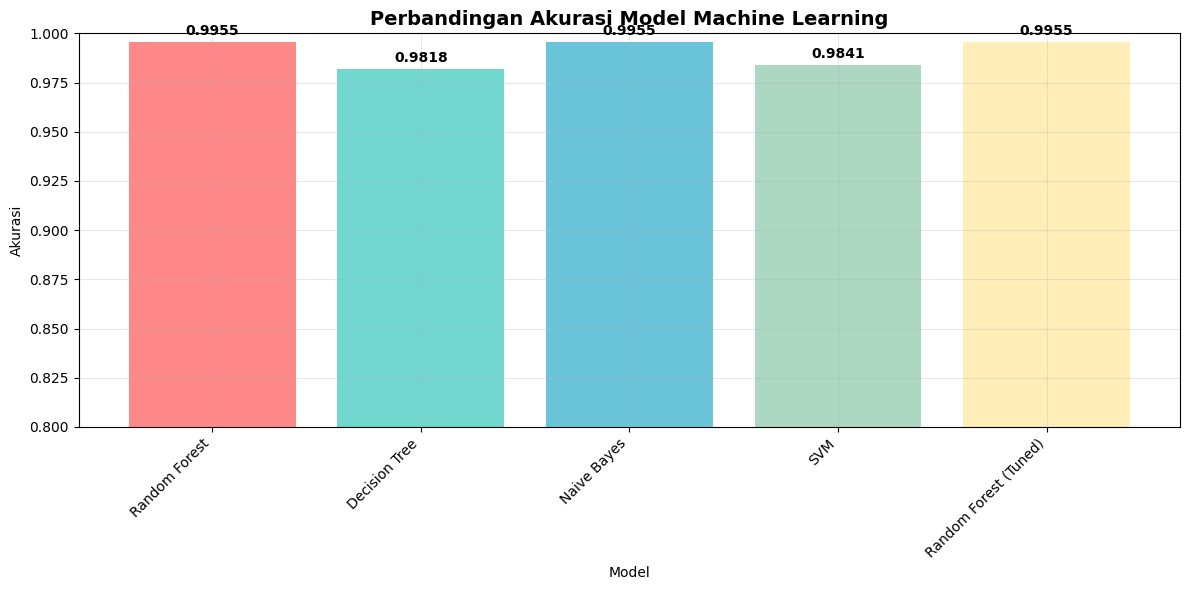


Classification Report - Random Forest:
--------------------------------------------------
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      0.95      0.97        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.95      1.00      0.98        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        20
       maize       0.95      1.00      0.98        20
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      1.00      1.00        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00 

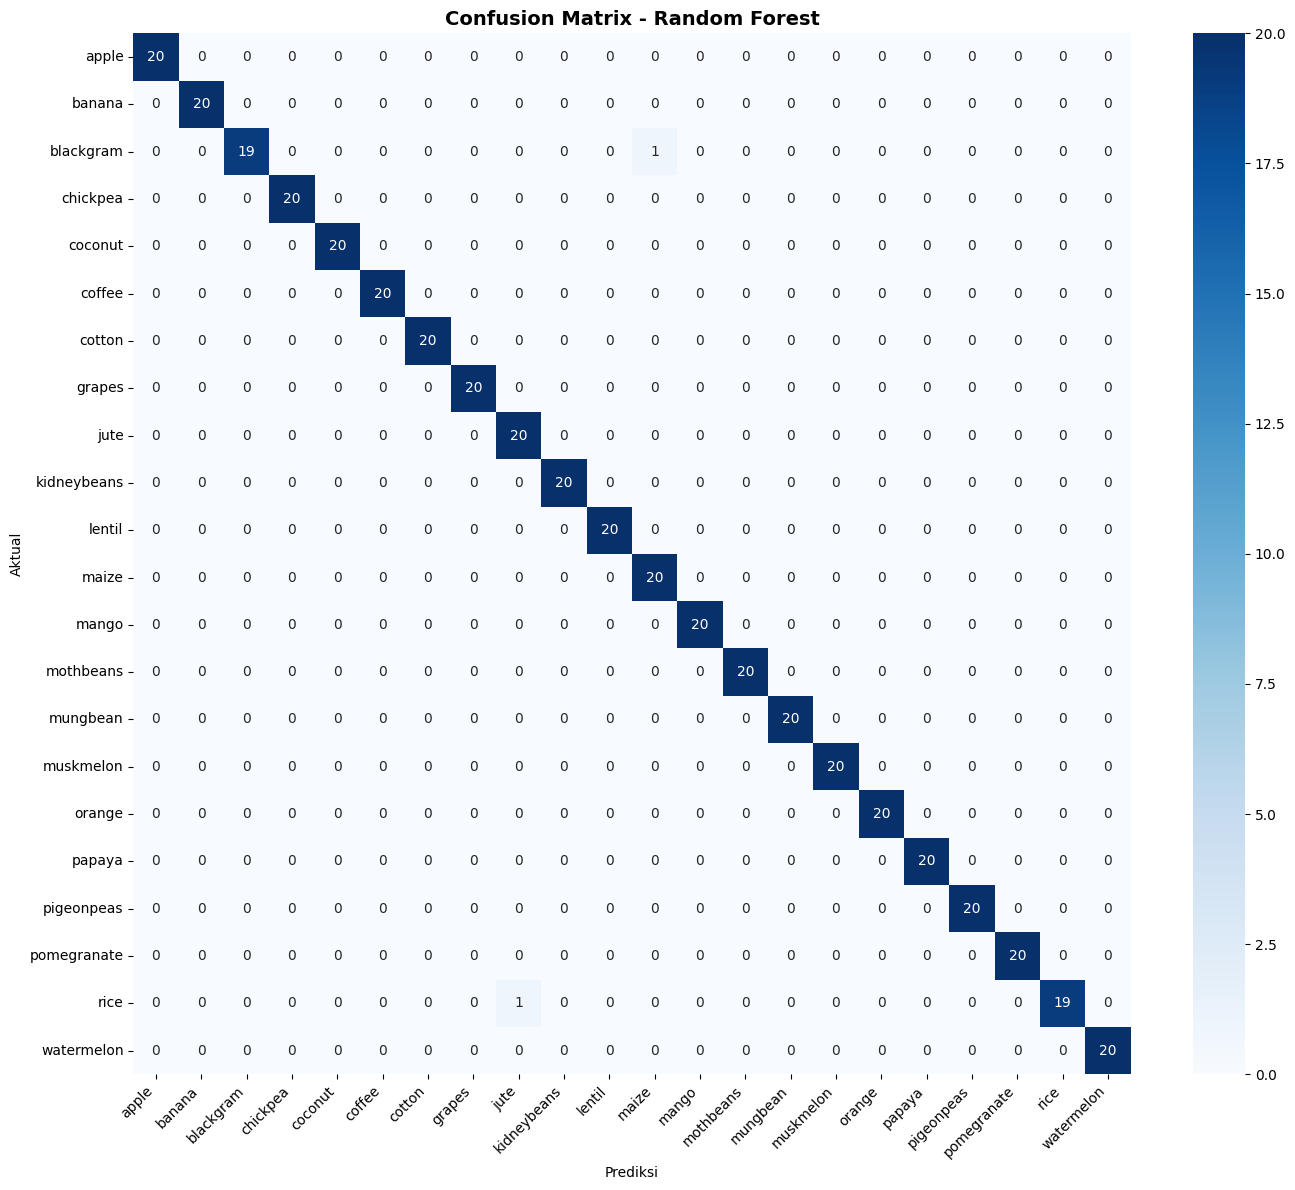

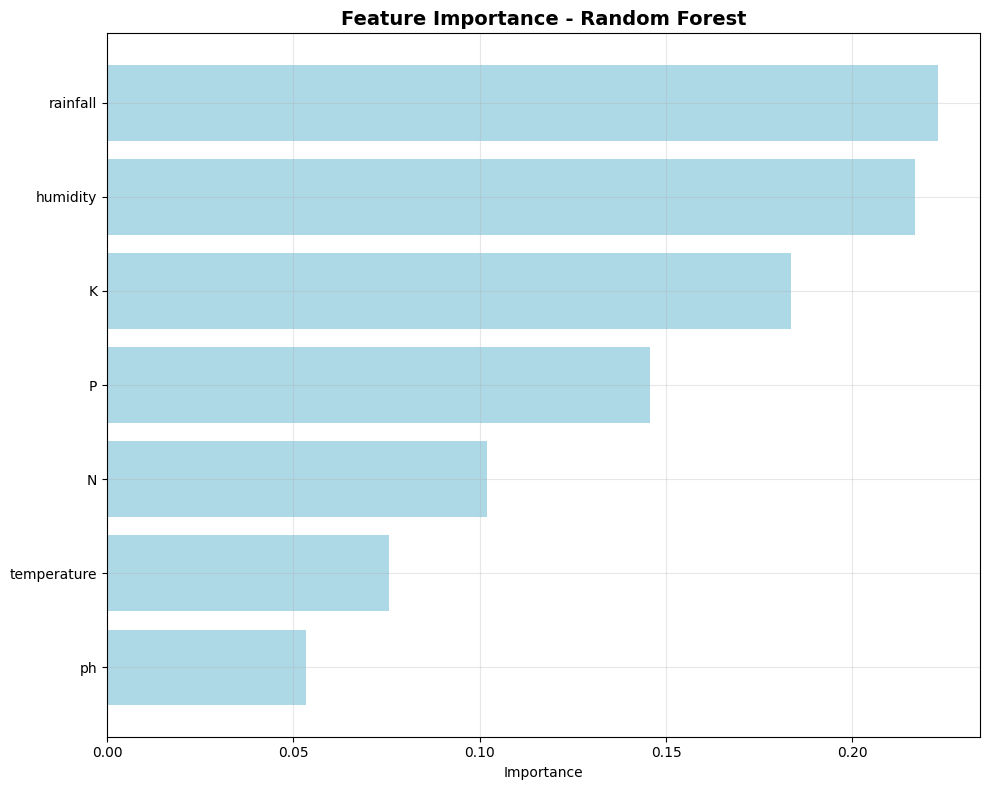


Feature Importance:
--------------------
rainfall    : 0.2231
humidity    : 0.2169
K           : 0.1834
P           : 0.1456
N           : 0.1020
temperature : 0.0755
ph          : 0.0535
. CROSS-VALIDATION - Random Forest
----------------------------------------
CV Scores: [0.99772727 0.99090909 0.99545455 0.99318182 0.98636364]
Mean CV Score: 0.9927 (+/- 0.0078)


In [23]:
# Perbandingan semua model
print("Perbandingan Akurasi Semua Model:")
print("-" * 35)
for model_name, accuracy in sorted(results.items(), key=lambda x: x[1], reverse=True):
    print(f"{model_name:<25}: {accuracy:.4f}")

# Visualisasi perbandingan model
plt.figure(figsize=(12, 6))
model_names = list(results.keys())
accuracies = list(results.values())
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7']

bars = plt.bar(model_names, accuracies, color=colors[:len(model_names)], alpha=0.8)
plt.title('Perbandingan Akurasi Model Machine Learning', fontsize=14, fontweight='bold')
plt.xlabel('Model')
plt.ylabel('Akurasi')
plt.ylim(0.8, 1.0)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)

# Menambahkan nilai akurasi di atas setiap bar
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.002,
             f'{accuracies[i]:.4f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Classification report untuk model terbaik
print(f"\nClassification Report - {best_model_name}:")
print("-" * 50)
target_names = label_encoder.classes_
print(classification_report(y_test, final_pred, target_names=target_names))

# Confusion Matrix
plt.figure(figsize=(14, 12))
cm = confusion_matrix(y_test, final_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.title(f'Confusion Matrix - {best_model_name}', fontsize=14, fontweight='bold')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Feature Importance (untuk tree-based models)
if hasattr(final_model, 'feature_importances_'):
    plt.figure(figsize=(10, 8))
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': final_model.feature_importances_
    }).sort_values('importance', ascending=True)

    plt.barh(feature_importance['feature'], feature_importance['importance'], color='lightblue')
    plt.title(f'Feature Importance - {best_model_name}', fontsize=14, fontweight='bold')
    plt.xlabel('Importance')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    print("\nFeature Importance:")
    print("-" * 20)
    for idx, row in feature_importance.sort_values('importance', ascending=False).iterrows():
        print(f"{row['feature']:<12}: {row['importance']:.4f}")

# Cross-validation untuk model terbaik
print(f". CROSS-VALIDATION - {best_model_name}")
print("-" * 40)

if best_model_name in ['Naive Bayes', 'SVM']:
    cv_scores = cross_val_score(final_model, X_scaled, y_encoded, cv=5, scoring='accuracy')
else:
    cv_scores = cross_val_score(final_model, X, y_encoded, cv=5, scoring='accuracy')

print(f"CV Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")


### insight Analisis Model ML - Prediksi Tanaman

### 1. Performa Model

**Top Performers (99.55% Akurasi):**

- Random Forest (Original & Tuned)
- Naive Bayes

**Insight:**

- Dataset memiliki pola sangat jelas
- Tuning Random Forest tidak signifikan → default sudah optimal
- Naive Bayes cocok → fitur mendukung asumsi independensi

**Model Lain:**

- SVM: 98.41%
- Decision Tree: 98.18% (berisiko overfitting)

---

### 2. Confusion Matrix

**Prediksi Sempurna (20/20):** 18 dari 22 kelas  
**Hampir Sempurna (19/20):**

- Blackgram → 1 false negative
- Rice → salah jadi jute

**Insight:**

- Tantangan klasifikasi: Blackgram & Rice
- Overall: misclassification sangat minim

---

### 3. Feature Importance (Random Forest)

1. Rainfall - 22.31%
2. Humidity - 21.69%
3. Potassium (K) - 18.34%
4. Phosphorus (P) - 14.56%
5. Nitrogen (N) - 10.20%
6. Temperature - 7.55%
7. pH - 5.35%

**Insight:**

- Faktor iklim (Rainfall + Humidity) paling dominan (44%)
- Nutrisi NPK juga sangat penting (43%)
- pH berpengaruh paling kecil

---

### 4. Cross-Validation

**Random Forest CV:**

- Mean: 99.27% (±0.78%)
- Rentang: 98.64% - 99.77%
- Stabil & reliable → tidak overfitting

---

### 5. Kunci Keberhasilan

- Data bersih & seimbang
- Fitur representatif
- Validasi dari berbagai model
- Evaluasi menyeluruh

---

### Kesimpulan

Model ML menunjukkan performa luar biasa (99.55%) dengan generalisasi tinggi. Siap digunakan untuk sistem rekomendasi tanaman berbasis iklim & tanah secara real-time dan scalable.



# **9.Testing**

Tahap terakhir melakukan testing model dengan data sampel baru untuk memvalidasi kemampuan prediksi dalam skenario real-world. Testing ini penting untuk memastikan model dapat memberikan rekomendasi tanaman yang akurat berdasarkan kondisi input yang diberikan.

In [24]:
sample_data = pd.DataFrame({
    'N': [90, 20, 40],
    'P': [42, 80, 20],
    'K': [43, 10, 30],
    'temperature': [20.8, 25.5, 22.0],
    'humidity': [82.0, 70.0, 65.0],
    'ph': [6.5, 7.2, 6.8],
    'rainfall': [202.9, 150.0, 180.0]
})

print("Data sampel untuk prediksi:")
print(sample_data)

# Prediksi menggunakan model terbaik
if best_model_name in ['Naive Bayes', 'SVM']:
    sample_scaled = scaler.transform(sample_data)
    sample_pred = final_model.predict(sample_scaled)
else:
    sample_pred = final_model.predict(sample_data)

# Decode prediksi kembali ke nama tanaman
predicted_crops = label_encoder.inverse_transform(sample_pred)

print("\nHasil Prediksi:")
print("-" * 15)
for i, crop in enumerate(predicted_crops):
    print(f"Sampel {i+1}: {crop}")

Data sampel untuk prediksi:
    N   P   K  temperature  humidity   ph  rainfall
0  90  42  43         20.8      82.0  6.5     202.9
1  20  80  10         25.5      70.0  7.2     150.0
2  40  20  30         22.0      65.0  6.8     180.0

Hasil Prediksi:
---------------
Sampel 1: rice
Sampel 2: pigeonpeas
Sampel 3: mango


### Insight Hasil Prediksi

#### Sampel 1  **Rice (Padi)**
- **Kondisi:** N=90, P=42, K=43, Suhu=20.8°C, Kelembapan=82%, pH=6.5, Curah Hujan=202.9 mm  
- **Alasan:** Curah hujan tinggi dan kelembapan udara yang tinggi merupakan kondisi ideal untuk budidaya padi. pH mendekati netral juga sesuai untuk pertumbuhan tanaman ini.

#### Sampel 2  **Pigeonpeas (Kacang Gude)**
- **Kondisi:** N=20, P=80, K=10, Suhu=25.5°C, Kelembapan=70%, pH=7.2, Curah Hujan=150.0 mm  
- **Alasan:** Kandungan fosfor yang tinggi serta pH netral mendukung pertumbuhan kacang-kacangan seperti pigeonpeas. Suhu dan curah hujan sedang juga sesuai untuk tanaman ini.

#### Sampel 3  **Mango (Mangga)**
- **Kondisi:** N=40, P=20, K=30, Suhu=22.0°C, Kelembapan=65%, pH=6.8, Curah Hujan=180.0 mm  
- **Alasan:** Kondisi iklim seimbang dengan suhu hangat, pH netral, dan curah hujan cukup cocok untuk pohon mangga yang memerlukan iklim tropis sedang dan tanah dengan drainase baik.


# **10. Kesimpulan Proyek**
### Ringkasan Hasil

- **Model Terbaik:** Random Forest dengan tingkat akurasi mencapai 99.55%.  
- **Faktor Paling Signifikan:** Curah hujan (22.31%) dan kelembapan udara (21.69%) menjadi variabel paling berpengaruh dalam prediksi.  
- **Konsistensi Model:** Skor validasi silang (CV Score) sebesar 99.27% menandakan model stabil dan tidak mengalami overfitting.  
- **Implementasi:** Model mampu memberikan prediksi yang masuk akal dan sesuai dengan kondisi data testing.

### Rekomendasi Penggunaan

- Sistem ini dapat digunakan sebagai alat bantu bagi petani dalam memilih jenis tanaman yang paling sesuai dengan kondisi lingkungan.  
- Model menunjukkan performa sangat baik dalam mengklasifikasikan 22 jenis tanaman berbeda.  
- Faktor iklim seperti curah hujan dan kelembapan lebih dominan dibandingkan faktor kondisi tanah dalam menentukan tanaman yang optimal.  
- Sistem ini berpotensi dikembangkan lebih lanjut menjadi aplikasi mobile atau web untuk kemudahan akses petani.

### Peluang Pengembangan Selanjutnya

- Menambahkan data historis untuk mendukung analisis musiman dan tren jangka panjang.  
- Mengintegrasikan data geografis dan topografi guna meningkatkan akurasi prediksi berdasarkan lokasi.  
- Menerapkan metode ensemble lain untuk meningkatkan ketahanan dan performa model.  
- Mengembangkan antarmuka yang mudah digunakan agar lebih ramah bagi pengguna akhir (petani).
